In [10]:
#Check iron line EW as a function of Teff and metallicity for Giant stars
%matplotlib inline
#posteior distribution of binomial data
import numpy as np
import numpy.linalg as nl
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib
import astropy.io.fits as fits
import scipy.special as special
from scipy.optimize import curve_fit

matplotlib.rc('xtick', labelsize=12) 
matplotlib.rc('ytick', labelsize=12) 

hdulist = fits.open('/Users/cliu/pyw/lamost_regular/data/DR3_Fe_Lines.fits')
dr3 = hdulist[1].data

In [14]:
#Select the good S/N samples
ind_good = (dr3.snrg>30) & (dr3.snri>30) & (dr3.teff>0)
print sum(ind_good)
#Select dwarf stars
ind_MS = ind_good & (dr3.TrueKGiant_Liu14!=84)
#Select K giant stars
ind_Giant = ind_good & (dr3.TrueKGiant_Liu14==84)

print sum(ind_MS),sum(ind_Giant)

/Users/cliu/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in greater
  from ipykernel import kernelapp as app


1539755
1185207 354548


In [32]:
teffgrid = np.arange(3800,8500,200)
teffcenter = (teffgrid[1:]+teffgrid[:-1])/2.0
fehgrid = np.arange(-2.5,0.5,0.2)
fehcenter = (fehgrid[1:]+fehgrid[:-1])/2.0
teffmesh,fehmesh = np.meshgrid(teffcenter,fehcenter)
mpMS_5270 = np.zeros((len(fehcenter),len(teffcenter)))
mpMS_5335 = np.zeros((len(fehcenter),len(teffcenter)))
mpKG_5270 = np.zeros((len(fehcenter),len(teffcenter)))
mpKG_5335 = np.zeros((len(fehcenter),len(teffcenter)))
for i in range(len(teffcenter)):
    for j in range(len(fehcenter)):
        ind1 = ind_MS & (dr3.teff>=teffgrid[i]) &\
            (dr3.teff<=teffgrid[i+1]) &\
            (dr3.feh>=fehgrid[j]) &\
            (dr3.feh<=fehgrid[j+1])
        mpMS_5270[j,i] = np.median(dr3.EW_Fe5270[ind1])
        mpMS_5335[j,i] = np.median(dr3.EW_Fe5335[ind1])
        ind1 = ind_Giant & (dr3.teff>=teffgrid[i]) &\
            (dr3.teff<=teffgrid[i+1]) &\
            (dr3.feh>=fehgrid[j]) &\
            (dr3.feh<=fehgrid[j+1])
        mpKG_5270[j,i] = np.median(dr3.EW_Fe5270[ind1])
        mpKG_5335[j,i] = np.median(dr3.EW_Fe5335[ind1])

/Users/cliu/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:12: RuntimeWarning: invalid value encountered in greater_equal
/Users/cliu/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:12: RuntimeWarning: invalid value encountered in less_equal
/Users/cliu/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:15: RuntimeWarning: invalid value encountered in greater_equal
/Users/cliu/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:15: RuntimeWarning: invalid value encountered in less_equal


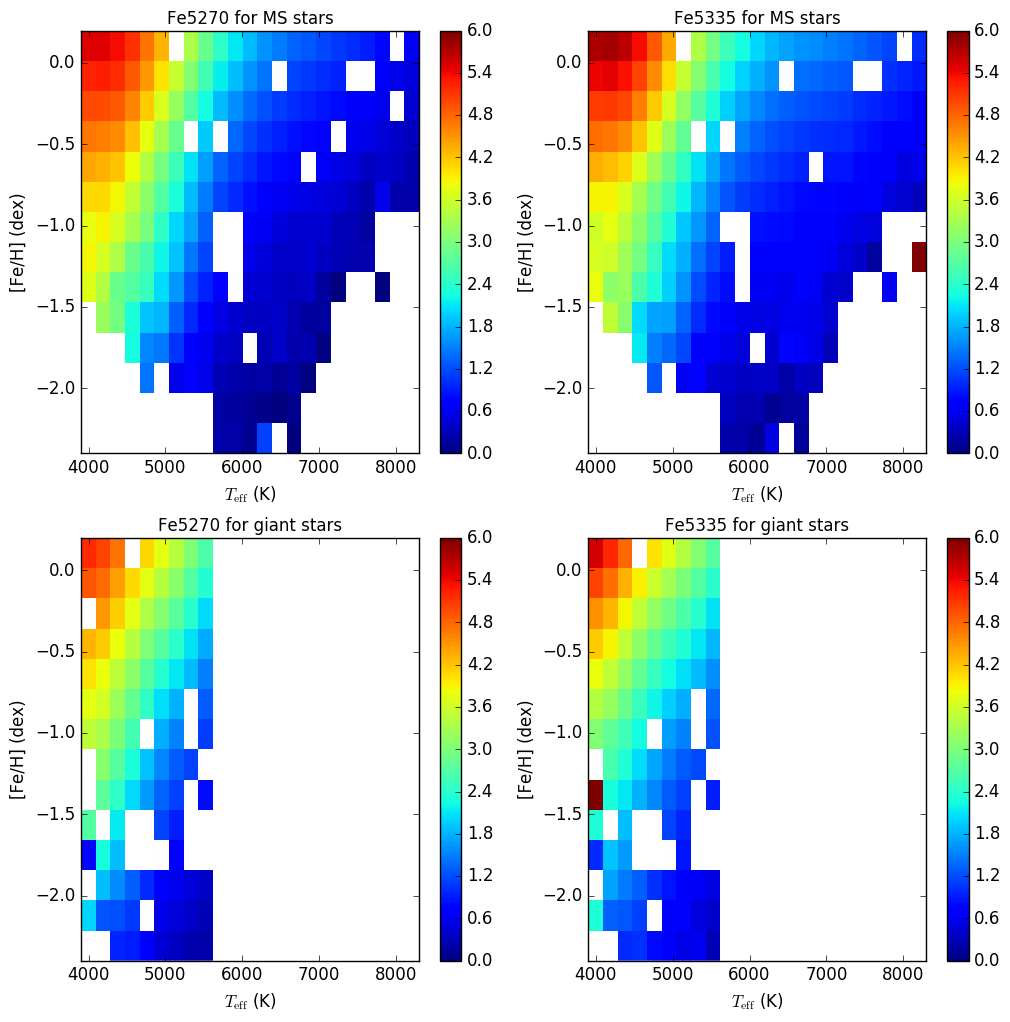

In [31]:
fig = plt.figure(figsize=[12,12])
ax = fig.add_subplot(221)
im = ax.imshow(mpMS_5270,extent=[teffcenter[0],teffcenter[-1],\
        fehcenter[-1],fehcenter[0]],interpolation='none',\
        aspect='auto',vmin=0,vmax=6)
plt.colorbar(im)
ax.set_xlim([teffcenter[0],teffcenter[-1]])
ax.set_ylim([fehcenter[0],fehcenter[-1]])
ax.set_xlabel(r'$T_{\rm eff}$ (K)',fontsize=12)
ax.set_ylabel(r'[Fe/H] (dex)',fontsize=12)
ax.set_title('Fe5270 for MS stars')
#----------------------
ax = fig.add_subplot(222)
im = ax.imshow(mpMS_5335,extent=[teffcenter[0],teffcenter[-1],\
        fehcenter[-1],fehcenter[0]],interpolation='none',\
        aspect='auto',vmin=0,vmax=6)
plt.colorbar(im)
ax.set_xlim([teffcenter[0],teffcenter[-1]])
ax.set_ylim([fehcenter[0],fehcenter[-1]])
ax.set_xlabel(r'$T_{\rm eff}$ (K)',fontsize=12)
ax.set_ylabel(r'[Fe/H] (dex)',fontsize=12)
ax.set_title('Fe5335 for MS stars')
#=========================
ax = fig.add_subplot(223)
im = ax.imshow(mpKG_5270,extent=[teffcenter[0],teffcenter[-1],\
        fehcenter[-1],fehcenter[0]],interpolation='none',\
        aspect='auto',vmin=0,vmax=6)
plt.colorbar(im)
ax.set_xlim([teffcenter[0],teffcenter[-1]])
ax.set_ylim([fehcenter[0],fehcenter[-1]])
#ax.set_xticks(np.arange(4000,5600,500))
ax.set_xlabel(r'$T_{\rm eff}$ (K)',fontsize=12)
ax.set_ylabel(r'[Fe/H] (dex)',fontsize=12)
ax.set_title('Fe5270 for giant stars')
#----------------------
ax = fig.add_subplot(224)
im = ax.imshow(mpKG_5335,extent=[teffcenter[0],teffcenter[-1],\
        fehcenter[-1],fehcenter[0]],interpolation='none',\
        aspect='auto',vmin=0,vmax=6)
plt.colorbar(im)
ax.set_xlim([teffcenter[0],teffcenter[-1]])
ax.set_ylim([fehcenter[0],fehcenter[-1]])
ax.set_xlabel(r'$T_{\rm eff}$ (K)',fontsize=12)
#ax.set_xticks(np.arange(4000,5600,500))
ax.set_ylabel(r'[Fe/H] (dex)',fontsize=12)
ax.set_title('Fe5335 for giant stars')

fig.show()

fig.savefig('FeLines_MSGiant.png',bbox_inches='tight')